# Telecom Churn Case Study (Machine Learning - 2 )

## Business problem:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## Business goal:
Retaining high profitable customers is the number one business goal

## How we retain customers?
We need to predict which customers are at high risk of churn. For this, we build models to identify customers at high risk of churn and also identifying main indicators of churn by analysing customer-level data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# getting data
customer_data= pd.read_csv('telecom_churn_data.csv')
customer_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
customer_data.shape # data has 99999 rows and 226 columns

(99999, 226)

## Data Cleaning

In [4]:
# Find missing values
round(100*(customer_data.isnull().sum()/customer_data.shape[0]))

mobile_number     0.0
circle_id         0.0
loc_og_t2o_mou    1.0
std_og_t2o_mou    1.0
loc_ic_t2o_mou    1.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 226, dtype: float64

In [5]:
# Since there are many columns, we will see the columns which have more than 50% missing values
missing_columns = round(100*(customer_data.isnull().sum()/customer_data.shape[0]))
missing_columns.loc[missing_columns > 50]

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

In [6]:
len(missing_columns.loc[missing_columns > 50])

40

There are 40 columns with more than 50% missing values. These 40 features have around 75% missing values(from above). Dropping these columns is not a good idea as these are important columns in determining the customer behaviour. We choose to keep the following columns:
- av_rech_amt_data: average recharge amount of mobile internet
- arpu: gives us the average revenue per user
- night_pck_user: tells if a customer is using the services at night so that we can offer special night packs to him
- fb_user: tells if a customer uses facebook so that we can give offers on browsing the facebook (like giving a fb pack at low cost so that the pack just works for facebook app)
- total_rech_data: total recharge amount of mobile internet
- count_rech: number of times user recharged on a network(like 2g or 3g)

For missing values in these columns, let's impute zeroes

In [7]:
columns_list = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g', 
                'total_rech_data','fb_user','night_pck_user']
for col in [col_pref + col_suff for col_suff in ['_6','_7','_8','_9'] for col_pref in columns_list]:
    customer_data[col].fillna(0, inplace=True)

In [8]:
# now columns with more than 50% missing values
missing_columns = round(100*(customer_data.isnull().sum()/customer_data.shape[0]))
missing_columns.loc[missing_columns > 50]

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
dtype: float64

In [9]:
# Dropping above columns
dropping_columns = list(missing_columns.loc[missing_columns > 50].index) # gives a list of above columns
customer_data.drop(dropping_columns, axis=1, inplace=True)

In [10]:
customer_data.shape # now we have 218 columns (removed 8 columns)

(99999, 218)

In [11]:
# now columns with more than 50% missing values
missing_columns = round(100*(customer_data.isnull().sum()/customer_data.shape[0]))
missing_columns.loc[missing_columns > 5]

onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [12]:
len(missing_columns.loc[missing_columns > 5])

29

In [13]:
# all the above columns have 8% missing values and for september month, the values are missing.
# imputing zeros in these columns
missing_columns_list = list(missing_columns.loc[missing_columns > 5].index) # gives a list of above columns
for col in missing_columns_list:
    customer_data[col].fillna(0, inplace=True)

In [14]:
# now columns with more than 0% missing values
missing_columns = round(100*(customer_data.isnull().sum()/customer_data.shape[0]))
len(missing_columns.loc[missing_columns > 0])

97

In [15]:
# there are 97 columns with more than 0% missing values. Let's see the columns which have more than 2% missing values
len(missing_columns.loc[missing_columns > 2])

89

In [16]:
# There are 89 columns which have more than 2% missing values. We cannot remove these columns as we might lose information.
# Let's see the number of rows for which these columns are missing.
missing_columns_list = list(missing_columns.loc[missing_columns > 2].index)
len(customer_data[customer_data[missing_columns_list].isnull().all(axis=1)])

381

In [17]:
# There are 381 customers(rows) for which these values are missing alltogether. 
# Since its a small number, we can remove these rows
customer_data=customer_data[~customer_data[missing_columns_list].isnull().all(axis=1)]

In [18]:
customer_data.shape # now there are 99618 rows and 218 columns. 

(99618, 218)

In [19]:
# For some customers(rows) only few of the columns might be missing. So imputing these rows with 0. 
missing_columns_list.remove('date_of_last_rech_8')
missing_columns_list.remove('date_of_last_rech_9')
for col in missing_columns_list:
    customer_data[col].fillna(0, inplace=True)

In [20]:
# now columns with more than 0% missing values
missing_columns = round(100*(customer_data.isnull().sum()/customer_data.shape[0]))
len(missing_columns.loc[missing_columns > 0])

9

In [21]:
# There are 9 columns with more than 0% missing values. These are:
missing_columns.loc[missing_columns > 0]

loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [22]:
# last_date_of_month_8, last_date_of_month_9 might be having unique values as they are last dates of months. Let's check this.
for col in list(missing_columns.loc[missing_columns > 0].index): 
    print("Unique values in column %s are %s" % (col,customer_data[col].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_6 are ['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26

In [23]:
'''
As expected, the columns last_date_of_month_8, last_date_of_month_9 are having unique values. But, the columns, 
loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou are also having unique values. So let's impute the missing values in these
columns with these unique values
'''
unique_columns = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7',
                  'last_date_of_month_8','last_date_of_month_9']
for col in unique_columns:
    customer_data[col].fillna(customer_data[col].mode()[0], inplace=True)


In [24]:
# Now after imputing the unique columns, lets see if there are any columns with more than 0% missing values
missing_columns = round(100*(customer_data.isnull().sum()/customer_data.shape[0]))
missing_columns.loc[missing_columns > 0]

date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [25]:
missing_columns_list = list(missing_columns.loc[missing_columns > 0].index)
len(customer_data[customer_data[missing_columns_list].isnull().all(axis=1)])

22

There are 22 customers which have the values for above columns missing alltogether. Though we remove these rows, there wont be any change in the above percentages of missing values. So we will impute the missing values for above columns as last date 
of that particular month

In [26]:
customer_data['date_of_last_rech_6'].fillna('6/30/2014', inplace=True)
customer_data['date_of_last_rech_7'].fillna('7/31/2014', inplace=True)
customer_data['date_of_last_rech_8'].fillna('8/31/2014', inplace=True)
customer_data['date_of_last_rech_9'].fillna('9/30/2014', inplace=True)

In [27]:
missing_columns = round(100*(customer_data.isnull().sum()/customer_data.shape[0]))
missing_columns.loc[missing_columns > 0]

Series([], dtype: float64)

Now there are no missing values in columns. Since we imputed many zeroes, let's see if any column has all values as zeroes and if any, let's drop those columns

In [28]:
zero_value_columns=customer_data.columns[(customer_data == 0).all()]
len(zero_value_columns)

11

In [29]:
# There are 11 columns where all values are zeroes. Let's drop these columns
customer_data.drop(zero_value_columns,axis=1,inplace=True)

In [30]:
customer_data.shape

(99618, 207)

After treating the missing values, we still have 207 features and 99618 columns

### Changing datatype and column names
There are few columns which have date but the datatype is of object. Let's convert the datatype for these columns to datetime

In [31]:
customer_data.reset_index(inplace=True,drop=True) # resetting index as we dropped some columns

In [32]:
date_columns = list(customer_data.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [33]:
# Converting dtype of date columns to datetime
for col in date_columns:
    customer_data[col] = pd.to_datetime(customer_data[col], format='%m/%d/%Y')

In [34]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 207 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(164), int64(35)
memory usage: 157.3 MB


In [35]:
# Few columns don't have month number as suffix but have month name as prefix. So fixing the columns names for these columns
customer_data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

### Deriving new features and filtering the data with high value customers
According to the problem, we need to predict churn for only high-value customers. 

<b>Define high-value customers as follows:</b> 
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

Now to filter the high value customers, we need to find the totla recharge amount done by the customer. 

In [36]:
'''
Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
These columns store the average recharge value for each customer for every month
Average = total recharge/num. of times customer recharged
'''
for i in range(6,10):
    customer_data['avg_rech_amt_'+str(i)] = round(customer_data['total_rech_amt_'+str(i)]/customer_data['total_rech_num_'+str(i)]+1,2)

In [37]:
customer_data["avg_rech_amt_9"].fillna(0, inplace=True)
customer_data["avg_rech_amt_8"].fillna(0, inplace=True)
customer_data["avg_rech_amt_7"].fillna(0, inplace=True)
customer_data["avg_rech_amt_6"].fillna(0, inplace=True)

In [38]:
'''
Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
These columns store the total number of times data recharge has been done for each month.
Total number of times data recharge has been done = no. of recharges for 2g data + no. of recharges for 3g data
'''
for i in range(6,10):
    customer_data['total_rech_num_data_'+str(i)] = (customer_data['count_rech_2g_'+str(i)]+customer_data['count_rech_3g_'+str(i)]).astype(int)

In [39]:
'''
Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
These columns store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.
Total recharge amount data = total no. of times data recharge is done*avg amount spent on data recharge
'''
for i in range(6,10):
    customer_data['total_rech_amt_data_'+str(i)] = customer_data['total_rech_num_data_'+str(i)]*customer_data['av_rech_amt_data_'+str(i)]

In [40]:
'''
Creating new feature: total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
These columns store the total recharge amount for each customer, for each month.
Total recharge amount = total recharge amount for data + total recharge amount for normal
'''
for i in range(6,10):
    customer_data['total_month_rech_'+str(i)] = customer_data['total_rech_amt_'+str(i)]+customer_data['total_rech_amt_data_'+str(i)]

In [41]:
customer_data.filter(regex=('total_month_rech_')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


Now we have got the total amount of recharge done by customer for the four months. We have to find average of each customer for the first two months (in good phase) and then see if the customer average is greater than or equal to 70th percentile. 

In [42]:
# Finding average of total recharge amount for the first two months
avg_in_two_months =(customer_data.total_month_rech_6 + customer_data.total_month_rech_7)/2

In [43]:
#Finding 70th perentile in above data
required_cutoff= np.percentile(avg_in_two_months,70)

In [44]:
# Filtering the high value users
customers_hv = customer_data[avg_in_two_months >=  required_cutoff]
customers_hv.reset_index(inplace=True,drop=True)

In [45]:
len(customers_hv)

29906

There are 29906 high-value customers for the companies. Now we need to find the customers who are about to churn in these customers and find the main indicators of churn

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [46]:
tagchurn_attributes= ['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [47]:
# For above columns, if value of the customer is 0 in all four variables, then we tag it as 1. Or else, we tag as 0
customers_hv['churn'] = (~customers_hv[[s for s in tagchurn_attributes]].any(axis=1)).map({True:1, False:0})

In [48]:
len(customers_hv[customers_hv.churn == 1])

2418

So there are 2418 customers tagged as churners from 29906 customers that is 8.08% churn cases from high-value customers

In [49]:
# Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
sept_month_list = customers_hv.filter(regex=('_9')).columns
customers_hv.drop(sept_month_list,axis=1,inplace=True)

## Data Analysis

Before model building, we will just analyse few variables with respect to churn column and find if there is any pattern or if there is any direct affect of a variable or a group of variables on churn prediction.

If you see the data, most of the coumns have month associated with them. Let's see if any column has no month associated with it.

In [50]:
non_month_cols = [col for col in customers_hv if str(col[-1]) not in ["6", "7", "8"]]
non_month_cols

['mobile_number', 'circle_id', 'aon', 'churn']

There are column columns not related to any month.

In [51]:
# Feature: circle_id, mobile_number
customers_hv.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

In [52]:
# All the values in circle_id are same. So, there is no use of this column. Hence, we can drop circle_id
customers_hv.drop('circle_id',axis=1,inplace=True)
# Dropping mobile_number as it is of no use in churn prediction
customers_hv.drop('mobile_number',axis=1,inplace=True)

In [53]:
# Feature: aon
customers_hv["aon"].describe()

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64

We can see that, minimum age of customers in the network is 180 days and average age is 1209 days. 

If a customer uses the services more, then he/she is unlikely to churn and vice-versa. Let's see if that's a pattern in our data also

Text(0, 0.5, 'Incoming MOU')

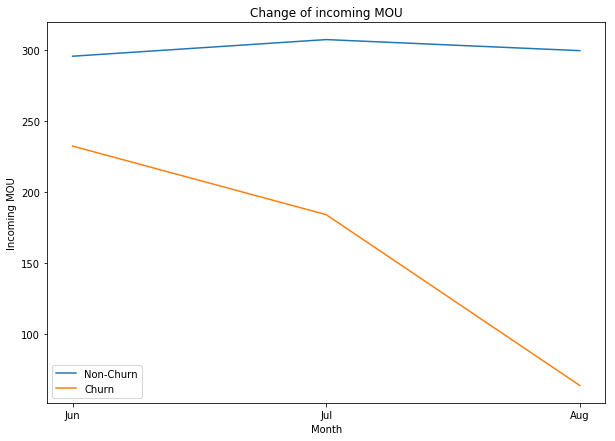

In [54]:
# Change in incoming MOU in the three months
total_ic_cols = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(customers_hv.groupby(['churn'])[total_ic_cols].mean().T)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.title("Change of incoming MOU")
plt.xlabel("Month")
plt.ylabel("Incoming MOU")

Text(0, 0.5, 'Outgoing MOU')

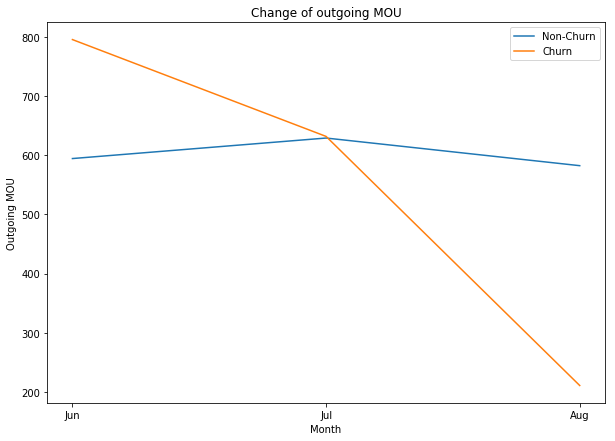

In [55]:
# Change in outgoing MOU in the three months
total_out_going_cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(customers_hv.groupby(['churn'])[total_out_going_cols].mean().T)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.title("Change of outgoing MOU")
plt.xlabel("Month")
plt.ylabel("Outgoing MOU")

From the two above figures, we can see that:
- For non-churn customers, both incoming and outgoing MOU's are more or less same.
- For churn customers, both incoming and outgoing MOU's changed drastically from July to August. 
- So we can say that the customers who are likely to churn will have less minutes of usage going to good phase to action phase. 
- So MOU is a good predictor to say if a customer is likely to be churned or not

Now that we have seen the effect of MOU on churn, let's see if this is the same pattern on data usage. Generally, the data usage should also decrease if a customer is likely to churn. 

In [56]:
'''
 We have separate data for 2g and 3g customers. We can combine it and create a new feature telling the data used in 
 mb on a whole
'''
for i in range(6,9):
    customers_hv['total_vol_data_mb_'+str(i)] = (customers_hv['vol_2g_mb_'+str(i)]+customers_hv['vol_3g_mb_'+str(i)]).astype(int)

Text(0, 0.5, 'Data usage')

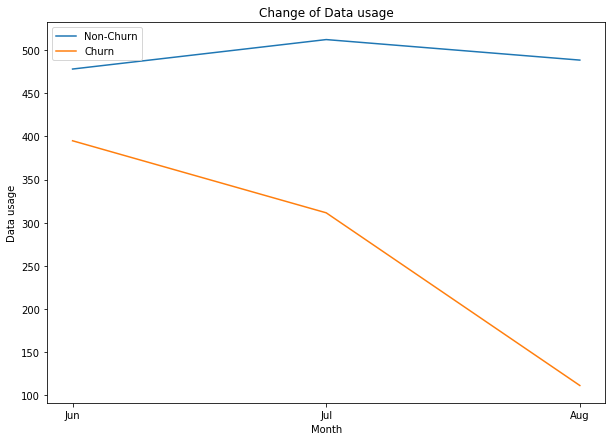

In [57]:
# Change in Data usage in the three months
total_data_cols = ['total_vol_data_mb_6','total_vol_data_mb_7','total_vol_data_mb_8']
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(customers_hv.groupby(['churn'])[total_data_cols].mean().T)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.title("Change of Data usage")
plt.xlabel("Month")
plt.ylabel("Data usage")

From above figure, we got a similar result as that of minutes of usage:
- For non-churn customers, data usage doesn't change much across the three months
- For churned customers, data usage decreases drastically across months especially when in action phase
- So data usage can also be a key predictor to say if a customer is likely to be churned or not

If MOU and Data usage decreases across months for churned customers, then the revenue for the churned should also decrease across months. Let's see if this is the pattern.

Text(0, 0.5, 'Avg. Revenue')

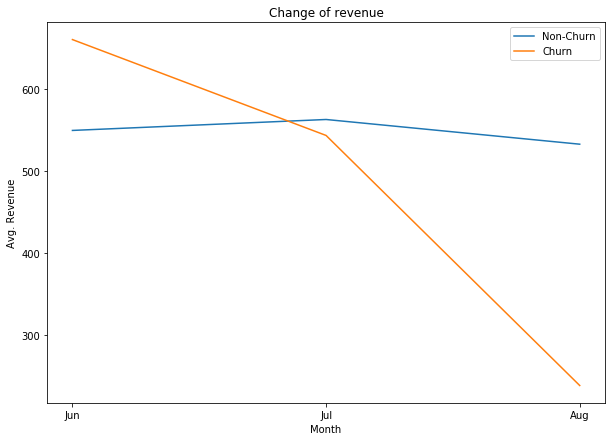

In [58]:
# Change in Data usage in the three months
total_arpu_cols = ['arpu_6','arpu_7','arpu_8']
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(customers_hv.groupby(['churn'])[total_arpu_cols].mean().T)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.title("Change of revenue")
plt.xlabel("Month")
plt.ylabel("Avg. Revenue")

From above graph, we can see that:
- For non-churned customers, the average revenue seems to have no variance across three months.
- For churned customers, the average revenue seems to drop drastically across months especially when in action phase
- So average revenue per customer can also be a key predictor to say if a customer is likely to be churned or not

Let's see the pattern of Roaming usage among churned and non-churned customers. We have a create a new feature for each month which captures both the incoming and outgoing roaming details of that month.

In [59]:
#Create new feature: roam_mou_6,roam_mou_7,roam_mou_8
for i in range(6,9):
    customers_hv['roam_mou_'+str(i)] = (customers_hv['roam_ic_mou_'+str(i)])+(customers_hv['roam_og_mou_'+str(i)])

Text(0, 0.5, 'Roaming MOU')

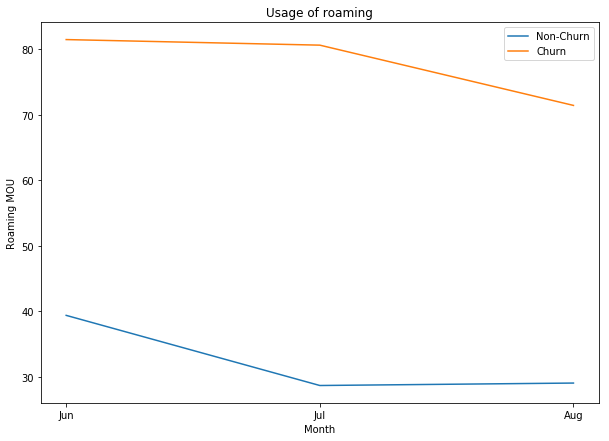

In [60]:
# Change in Roaming usage in the three months
total_roam_cols = ['roam_mou_6','roam_mou_7','roam_mou_8']
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(customers_hv.groupby(['churn'])[total_roam_cols].mean().T)
ax.set_xticklabels(['Jun','Jul','Aug'])
plt.legend(['Non-Churn', 'Churn'])
plt.title("Usage of roaming")
plt.xlabel("Month")
plt.ylabel("Roaming MOU")

From above graph, we can see that:=
- For non-churned customers, the roaming MOU seems to very low across three months.
- For churned customers, the roaming MOU seems to very high across three months.
- Generally, roaming is costly. So if a customer uses more roaming, he is ought to pay more. He is likely to be churned out because of the price for roaming. If we can reduce the price for roaming, we can prevent the customer from being churned out

### Modelling

We will use PCA for removing any multicollinearity and removing features which are not too useful.

In [61]:
# removing the datatime columns before PCA
dateTimeCols = list(customers_hv.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
customers_hv.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [62]:
#Test-train split
from sklearn.model_selection import train_test_split

#putting features variables in X
X = customers_hv.drop(['churn'], axis=1)

#putting response variables in Y
y = customers_hv['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [63]:
#Rescaling the features before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling class-imbalance
In our data, only 8.08% are churned cases, which means the chuned cases are in minority. In this case, the model might end up in predicting the majority class most of the time when we are building model for predicting minority class. This is a problem with class imbalance. 

###### How to deal with class imbalance?
There are various ways to treat the class imbalance but we will be using the resampling techniques. 
SMOTE is one of the widely used resampling technique. In this technique, we create new rows which are similar to existing minority data.

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 'minority')
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

In [65]:
print("After over-sampling, sum of churned cases: {}".format(sum(y_train_new == 1)))
print("After over-sampling, sum of churned cases: {}".format(sum(y_train_new == 0)))

After over-sampling, sum of churned cases: 19234
After over-sampling, sum of churned cases: 19234


As you can see, after over-sampling, the sum of both classes are equal. 

In [66]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca_model = PCA(random_state=42)

In [67]:
#Doing the PCA on the train data
pca_model.fit(X_train_new)

PCA(random_state=42)

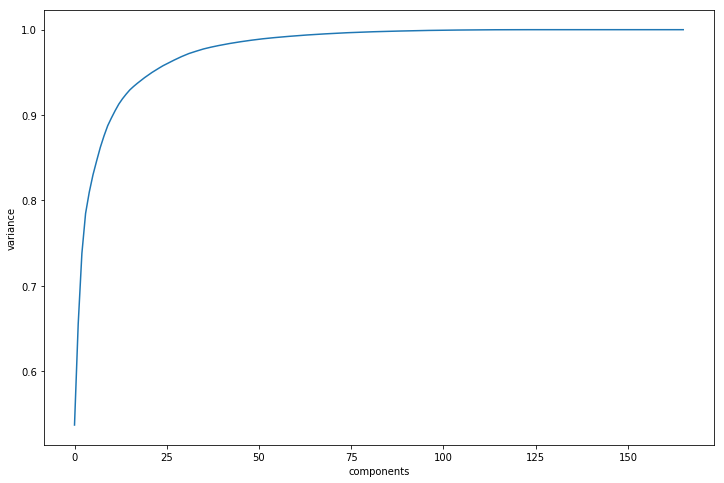

In [68]:
#Making the screeplot
# Scree plot gives variance against the number of components so that we can choose appropriate components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('variance')
plt.show()

As you can see from above graph, 95% of the variace is explained by 35 components. So we will choose 35 components for modelling

In [69]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [70]:
X_train_new_pca = pca_final.fit_transform(X_train_new)
X_train_new_pca.shape

(38468, 35)

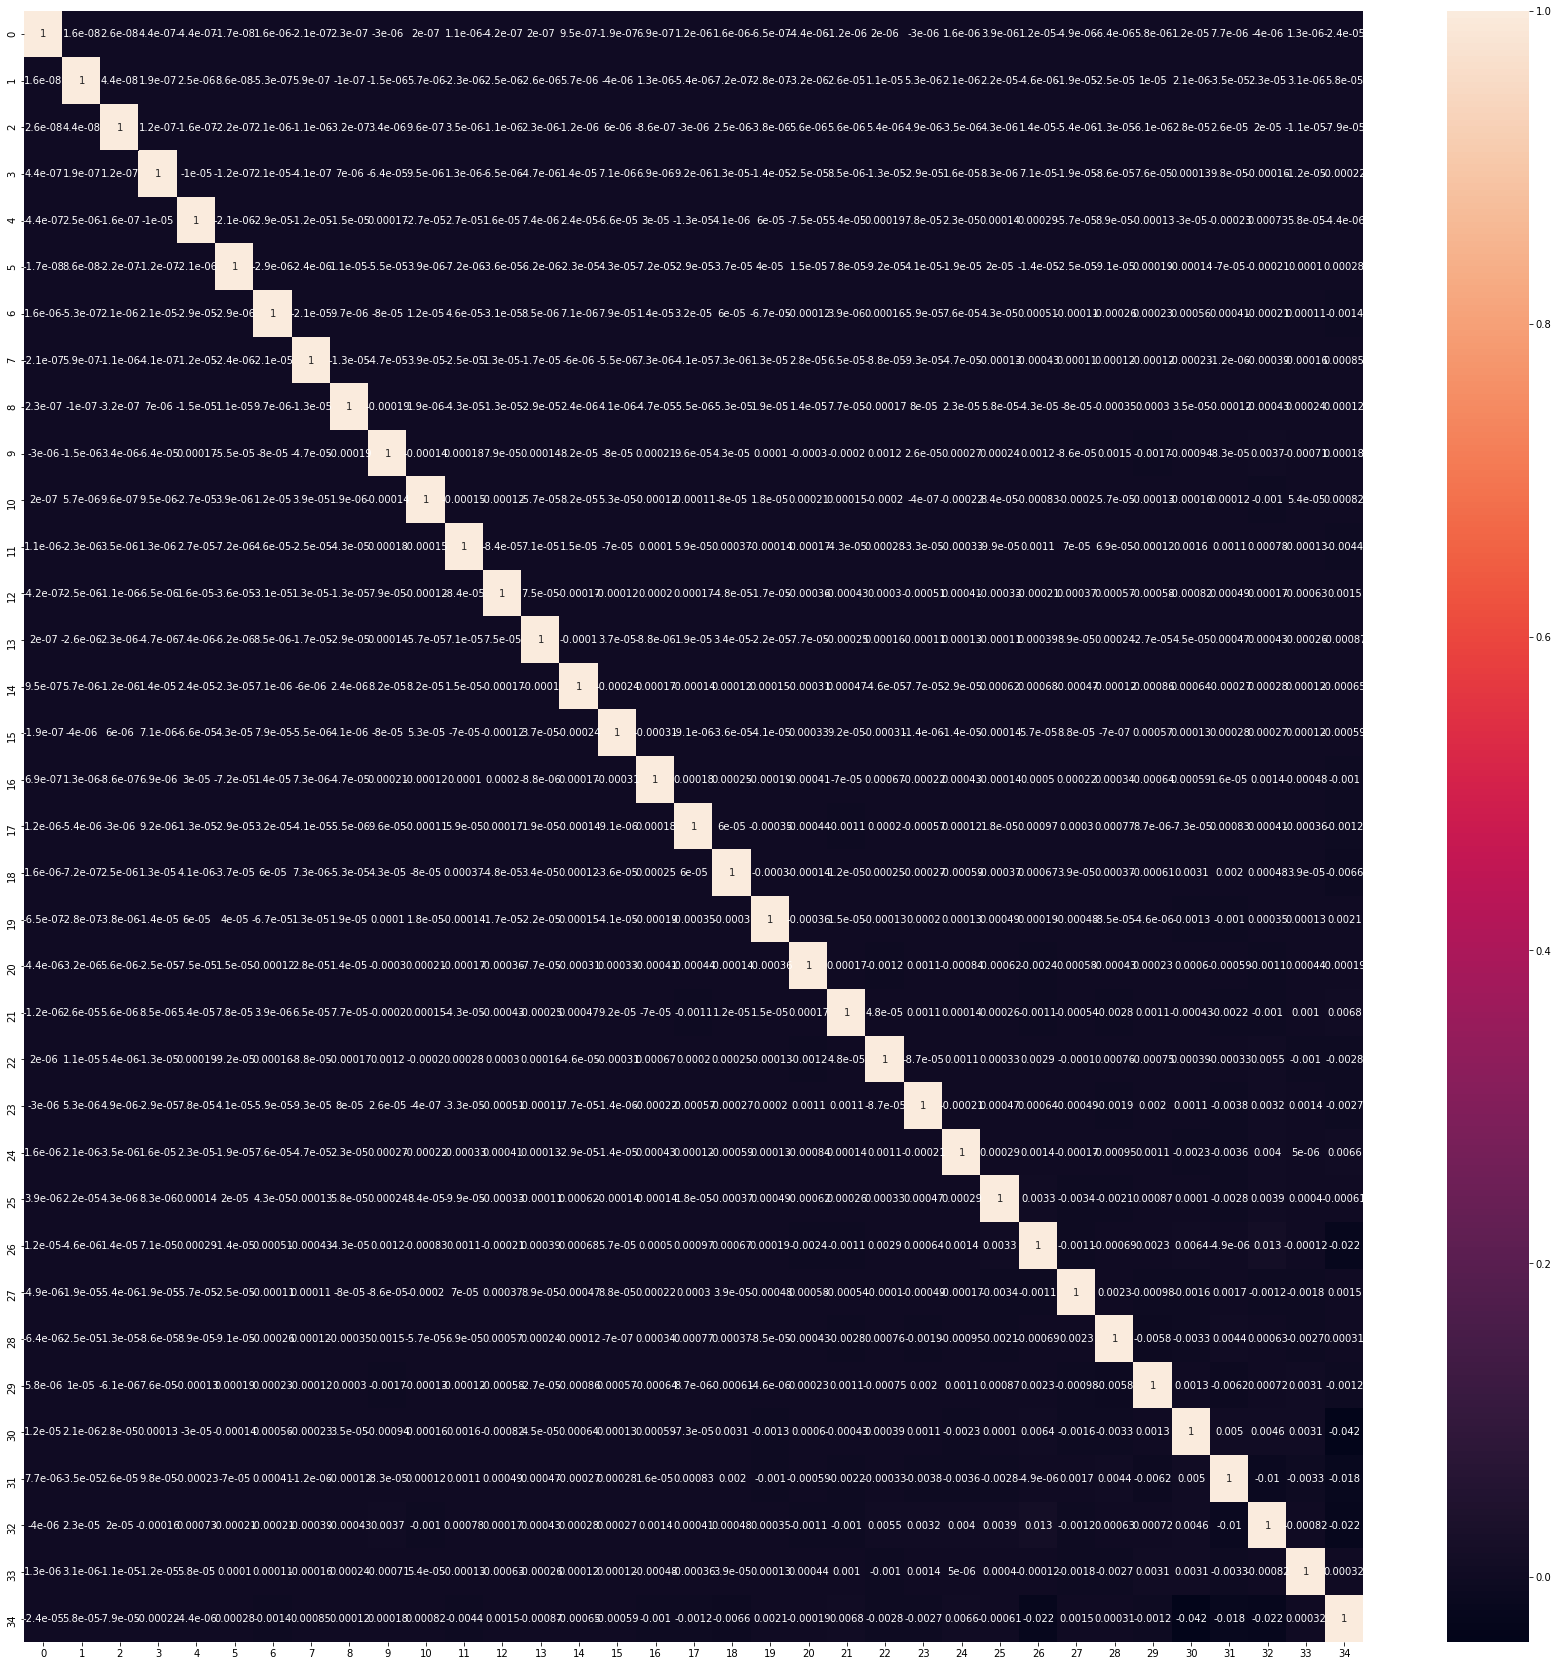

In [71]:
corrmat = np.corrcoef(X_train_new_pca.transpose())
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

As you can see from above heatmap, there is no correlation among the components. 

In [72]:
#Applying selected components to the test data - 50 components
X_test_new_pca = pca_final.transform(X_test)
X_test_new_pca.shape

(8972, 35)

Now we have got the principal components, we have to fit a model for churn prediction. We will use logistic regression to fit the model

#### Logistic Regression


In [73]:
# Applying logistic regression to the components
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg = LogisticRegression()

In [74]:
log_reg.fit(X_train_new_pca, y_train_new)
#Predict training set:
training_pred = log_reg.predict(X_train_new_pca)
print("ROC-AUC score(Train) {}".format(metrics.roc_auc_score(y_train_new, training_pred)))

ROC-AUC score(Train) 0.8280648850993032


In [75]:
#Predict test set:
test_pred = log_reg.predict(X_test_new_pca)
print("ROC-AUC score(Test) {}".format(metrics.roc_auc_score(y_test, test_pred)))

ROC-AUC score(Test) 0.814881009831985


Now that we have predicted the training and test set and got a good ROC-AUC scores, let us select a arbitrary cut-off probability and check the original data with that of predicted values

In [76]:
cut_off_prob=0.5
# predict
pred_probabilities = log_reg.predict_proba(X_train_new_pca)[:,1]
y_train_df= pd.DataFrame({'churn':y_train_new, 'churn_Prob':pred_probabilities})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_train_df['final_predicted'] = y_train_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)
y_train_df.head()

,churn,churn_Prob,final_predicted
0,0,0.744369,1
1,0,0.010879,0
2,0,0.129319,0
3,0,0.027735,0
4,0,0.839110,1


In [77]:
print("Roc Auc score: {}".format(metrics.roc_auc_score(y_train_df.churn,y_train_df.final_predicted)))

Roc Auc score: 0.8280648850993032


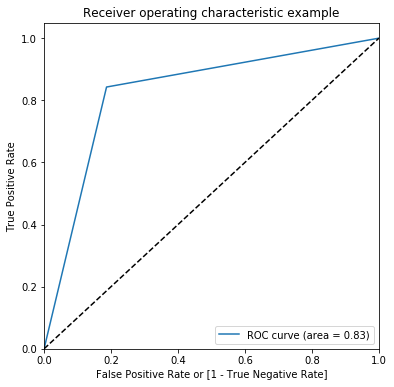

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_df.churn, y_train_df.final_predicted,
                                              drop_intermediate = False )
roc_auc_score = metrics.roc_auc_score(y_train_df.churn,y_train_df.final_predicted)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Now that the ROC-AUC score is arount 0.83 and from the above figure, the curve is more towards the left-side of the figure and close to the top, which means we have fit a good model, with good cut-off of 0.5

Hence, the resulting model, after PCA and logistic regression (with cutoff of 0.5) has a good Roc Accuracy on the train and test set and the right balance between TPR and FPR(as seen from figure)

Train ROC-AUC score: 0.8280648850993032; Test ROC-AUC score: 0.814881009831985

Now that we have got the model to predict if a customer is likely to churn or not, we now have to find the features which are most relavant to churn

We will use RandomForestClassifier to identify the features more relavant to churn

In [79]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=12,
                            max_features=20)

In [80]:
forest.fit(X_train_new, y_train_new)

RandomForestClassifier(max_depth=12, max_features=20)

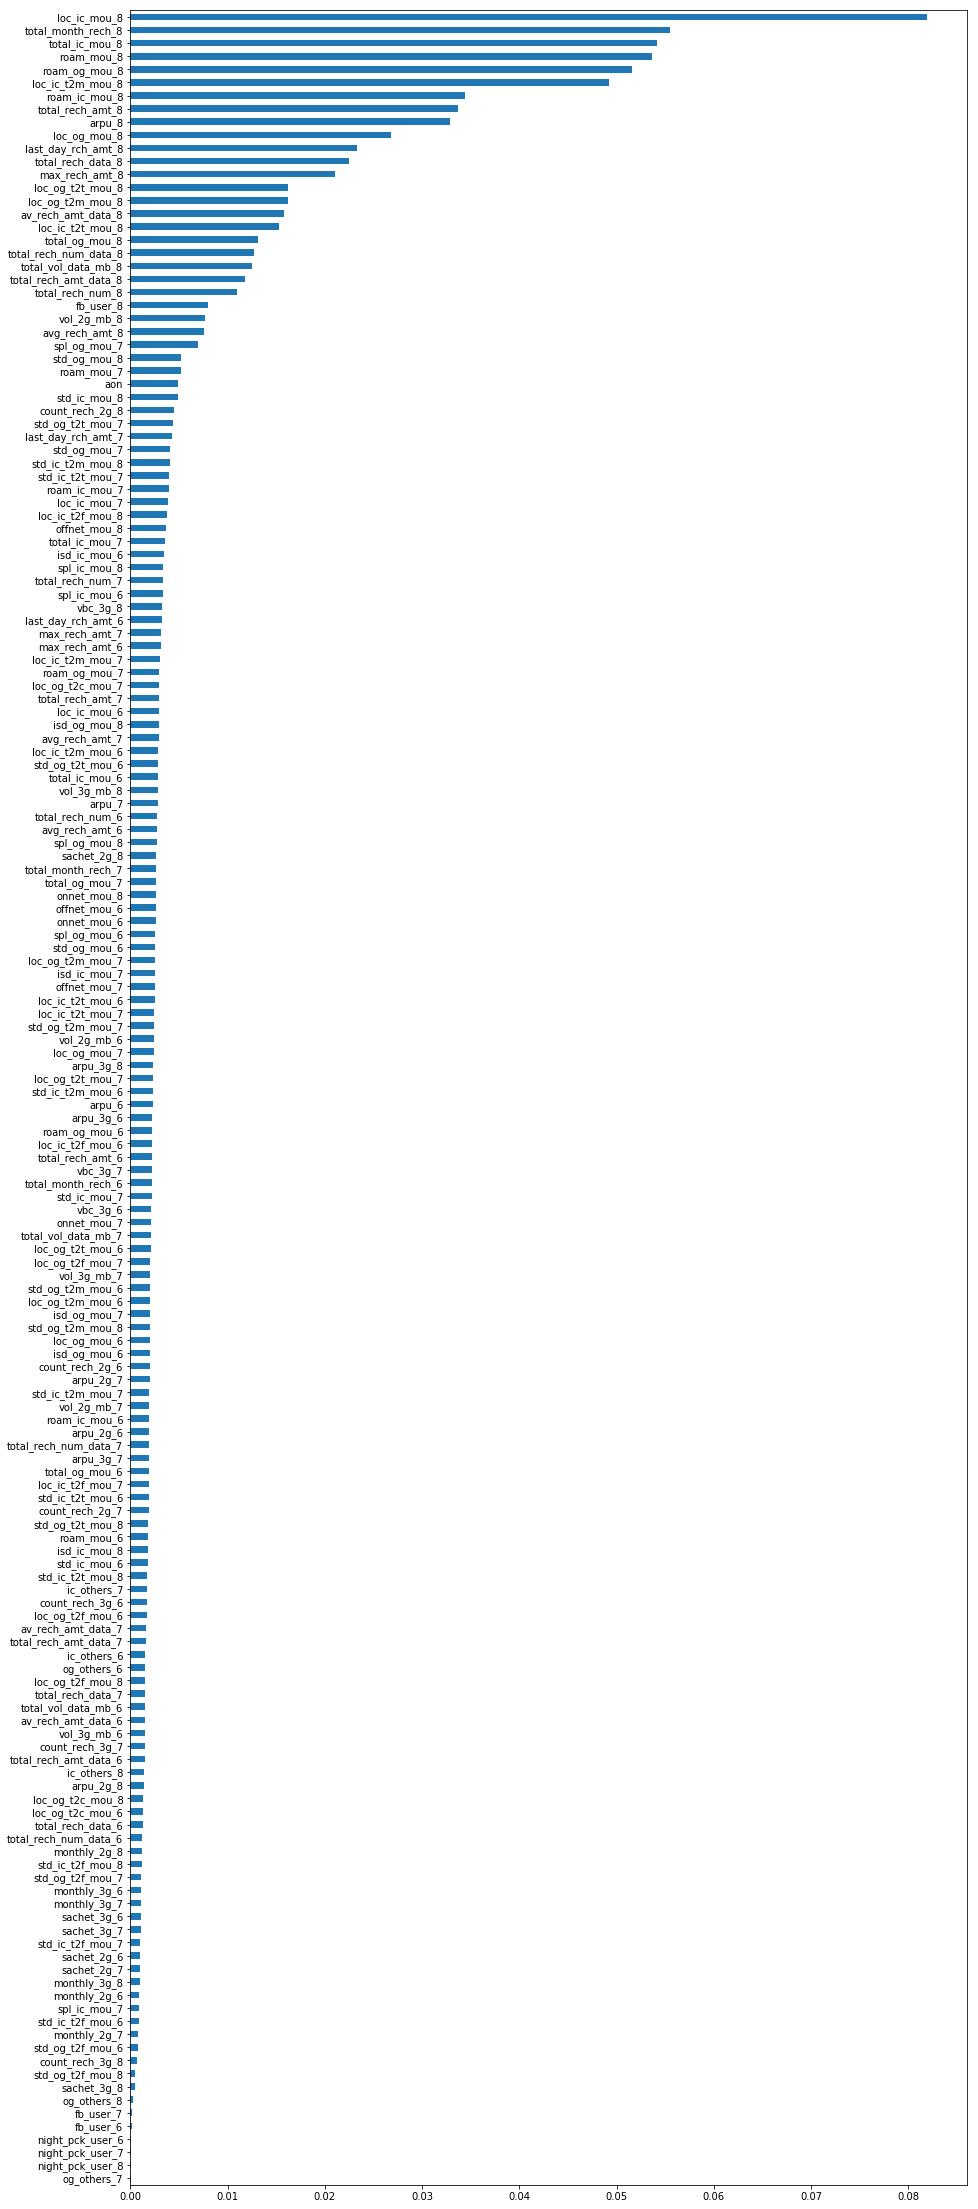

In [81]:
plt.figure(figsize=(15,40))
important_features = pd.Series(forest.feature_importances_, index=X.columns)
important_features.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

From above graph we can pick the top 10 features which have direct impact to idntify if a customer churns out or not. If we see specifically, all these features are in 8th month that is the action phase. So, we can tell if a customer churns out or not by seeing the customer behaviour in action phase. The top 10 variables are:

- total_mon_rech_8: Total recharge in 8th month
- total_ic_mou_8: Total incoming minutes of usage in 8th month
- loc_ic_t2m_mou_8: Minutes of local incoming calls (calls in same circle) of another operator in 8th month
- loc_ic_mou_8: Minutes of local incoming call in 8th month
- roam_ic_mou_8: Minutes of incoming calls via roaming in 8th month
- roam_mou_8: Minutes of usage under roaming for 8th month
- roam_og_mou_8: Minutes of outgoing calls via roaming in 8th month
- total_rech_amt_8: total recharge amount(excluding mobile internet) in 8th month
- loc_og_t2m_mou_8: Minutes of local outgoing calls (calls in same circle) of another operator in 8th month
- loc_og_mou_8: Minutes of local outgoing call in 8th month

### Recommend strategies to manage customer churn

1) From the data analysis part we have seen that the minutes of usage is decreasing drastically in the action phase. So, if we monitor a customer and find if the customer usage is decreasing specifically in the action phase, we could make necessary steps to retain the customer (like providing new customer specific offers)

2) From the data analysis part we have seen that the data (mobile internet) usage in decreasing drastically in the action phase. So, if we monitor a customer and find if the customer data usage is decreasing specifically in the action phase, we could make necessary steps to retain the customer (like providing new customer specific data packs and night packs)

3) If we see the outgoing services graph in the data analysis, it was high in the good phase drastically reduced in the action phase. This might be due to many reasons like high prices, poor network etc. We can contact customer to know the problem and his experience and thereby taking necessary steps to make the experience better.

4) If we see the roaming services graph in the data analysis, it is very high for the churned customers than non-churned. This means that the churned customers are most likely to be under roaming when they are using the services. Since roaming charges are usually high, customer will opt for the network with low roaming charges and chnges the network. In this case, we can either decrease the roaming charges or provide customer specific offers based on his usage

From above steps, we can identify if a customer is likely to be churned out or not and take the necessaru action